In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# right-hand side of ODE
cz = 0.22
lbd = 3*cz - 1

def f(r, X, w):
    f2 = -2*X[1]/r + (1 - w*w)*X[0] + X[0]*X[2] + lbd*np.power(X[0],3)
    f1 = X[1]
    f4 = -2*X[3]/r + (1 + w*w)*np.power(X[0],2) + np.power(X[1],2) + lbd*np.power(X[0],4)/16
    f3 = X[3] 
    return np.array([f1, f2, f3, f4])

# interval of solution and number of steps
ri, rf = 0, 1000
steps = 10000
dr = (rf - ri)/steps

# single step of RK4
def rk4step(r, X, w):
    k1 = dr*f(r, X, w)
    k2 = dr*f(r + dr/2, X + k1/2, w)
    k3 = dr*f(r + dr/2, X + k2/2, w)
    k4 = dr*f(r + dr, X + k3, w)
    return X + (k1 + 2*k2 + 2*k3 + k4)/6

def rk4(Xbc, w):
    # initialize the arrays
    rinterv = np.linspace(ri, rf, steps, endpoint=True)
    Xs = np.zeros((4, steps))

    # boundary conditions
    Xs[..., 0] = Xbc

    # perform RK4
    for step in np.arange(1, steps):
        rnow = rinterv[step]
        Xs[..., step] = rk4step(rnow, Xs[..., step - 1], w)

    return Xs

C:\Users\gsali\AppData\Local\Temp/ipykernel_27808/1536205681.py:8: RuntimeWarning: overflow encountered in power
  f4 = -2*X[3]/r + (1 + w*w)*np.power(X[0],2) + np.power(X[1],2) + lbd*np.power(X[0],4)/16
C:\Users\gsali\AppData\Local\Temp/ipykernel_27808/1536205681.py:6: RuntimeWarning: overflow encountered in double_scalars
  f2 = -2*X[1]/r + (1 - w*w)*X[0] + X[0]*X[2] + lbd*np.power(X[0],3)
C:\Users\gsali\AppData\Local\Temp/ipykernel_27808/1536205681.py:6: RuntimeWarning: overflow encountered in power
  f2 = -2*X[1]/r + (1 - w*w)*X[0] + X[0]*X[2] + lbd*np.power(X[0],3)
C:\Users\gsali\AppData\Local\Temp/ipykernel_27808/1536205681.py:8: RuntimeWarning: invalid value encountered in double_scalars
  f4 = -2*X[3]/r + (1 + w*w)*np.power(X[0],2) + np.power(X[1],2) + lbd*np.power(X[0],4)/16
C:\Users\gsali\AppData\Local\Temp/ipykernel_27808/1536205681.py:6: RuntimeWarning: invalid value encountered in double_scalars
  f2 = -2*X[1]/r + (1 - w*w)*X[0] + X[0]*X[2] + lbd*np.power(X[0],3)


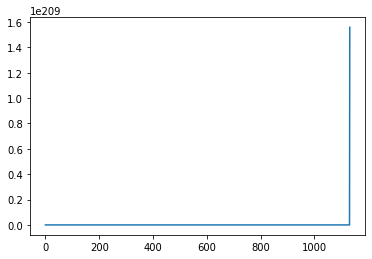

In [69]:
w = 0.9
theta0, phi0 = 1e-8, -1e-5
Xbc = np.array([theta0, 0, phi0, 0])

plt.plot(rk4(Xbc, w)[0].T)